In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
import os, h5py


In [2]:
nside = 1024
npix = hp.nside2npix(nside)

METAINFO = "/cluster/scratch/athomsen/CosmoGrid/raw/v11desy3/metainfo_perms.npy"

FILE_DIR = "/cluster/scratch/athomsen/CosmoGrid/raw/v11desy3/fiducial/cosmo_fiducial/perm_0000"
FILE = os.path.join(FILE_DIR, f"projected_probes_maps_v11dmo.h5")

In [3]:
metainfo_perms = np.load(METAINFO)

In [4]:
metainfo_perms = np.load(METAINFO)
print(len(metainfo_perms))
print(metainfo_perms.dtype.names)

metacal1__delta_meanz = metainfo_perms["metacal1__delta_meanz"]
metacal1__delta_sigmaz = metainfo_perms["metacal1__delta_sigmaz"]
maglim2__delta_meanz = metainfo_perms["maglim2__delta_meanz"]

42040
('As', 'H0', 'O_cdm', 'O_nu', 'Ob', 'Ol', 'Om', 'bary_Mc', 'bary_nu', 'benchmark_type', 'box_size_Mpc_over_h', 'delta', 'id_param', 'm_nu', 'n_particles', 'n_shells', 'n_steps', 'ns', 'path_par', 'row_id_parslist', 's8', 'sobol_index', 'w0', 'wa', 'dirname_perm', 'halton_point_id', 'id_perm', 'metacal1__delta_meanz', 'metacal1__delta_sigmaz', 'metacal2__delta_meanz', 'metacal2__delta_sigmaz', 'metacal3__delta_meanz', 'metacal3__delta_sigmaz', 'metacal4__delta_meanz', 'metacal4__delta_sigmaz', 'maglim1__delta_meanz', 'maglim1__delta_sigmaz', 'maglim2__delta_meanz', 'maglim2__delta_sigmaz', 'maglim3__delta_meanz', 'maglim3__delta_sigmaz', 'maglim4__delta_meanz', 'maglim4__delta_sigmaz')


In [41]:
fiducial = metainfo_perms[metainfo_perms["delta"] == "fiducial"]
delta_Om_m = metainfo_perms[metainfo_perms["delta"] == "delta_Om_m"]

print(fiducial["maglim3__delta_meanz"] == delta_Om_m["maglim3__delta_meanz"])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [33]:
np.unique(metainfo_perms["delta"])

array(['delta_H0_m', 'delta_H0_p', 'delta_Ob_m', 'delta_Ob_p',
       'delta_Om_m', 'delta_Om_p', 'delta_bary_Mc_m', 'delta_bary_Mc_p',
       'delta_bary_nu_m', 'delta_bary_nu_p', 'delta_ns_m', 'delta_ns_p',
       'delta_s8_m', 'delta_s8_p', 'delta_w0_m', 'delta_w0_p', 'fiducial',
       'none'], dtype='<U128')

In [25]:
metainfo_perms[metainfo_perms["metacal1__delta_meanz"] == -0.0003]["sobol_index"]

array([-999, -999, -999, ..., -999, -999, -999], dtype=int32)

In [26]:
unique, counts = np.unique(metacal1__delta_meanz, return_counts=True)

(array([2.25e+04, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([1.000e+00, 2.530e+02, 5.050e+02, 7.570e+02, 1.009e+03, 1.261e+03,
        1.513e+03, 1.765e+03, 2.017e+03, 2.269e+03, 2.521e+03]),
 <BarContainer object of 10 artists>)

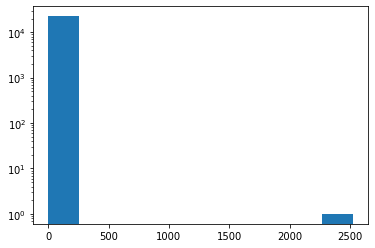

In [31]:
plt.hist(counts, log=True)

In [27]:
np.max(counts)

2521

In [28]:
np.argmax(counts)

11250

In [29]:
unique[11250]

-0.0003

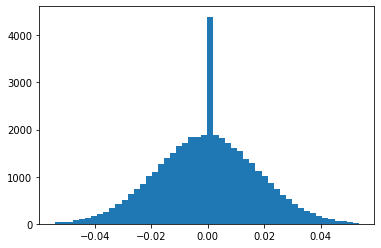

In [24]:
plt.hist(metainfo_perms["metacal1__delta_meanz"], bins=50);

In [65]:
wl_bins = [f"metacal{i}" for i in range(1,5)]
gc_bins = [f"maglim{i}" for i in range(1,5)]

with h5py.File(FILE, "r") as f:
    pix_ind = f["pix_ind"][:]
    
    print(f.keys())
    print(f["kg"].keys())
    print(f["kd"].keys())
    print(f["dg"].keys())
    print(f["kcmb"].keys())

<KeysViewHDF5 ['dg', 'dg2', 'ia', 'kcmb', 'kd', 'kg', 'pix_ind']>
<KeysViewHDF5 ['metacal1', 'metacal2', 'metacal3', 'metacal4']>
<KeysViewHDF5 ['metacal1', 'metacal2', 'metacal3', 'metacal4']>
<KeysViewHDF5 ['maglim1', 'maglim2', 'maglim3', 'maglim4', 'metacal1', 'metacal2', 'metacal3', 'metacal4']>
<KeysViewHDF5 ['cmb']>


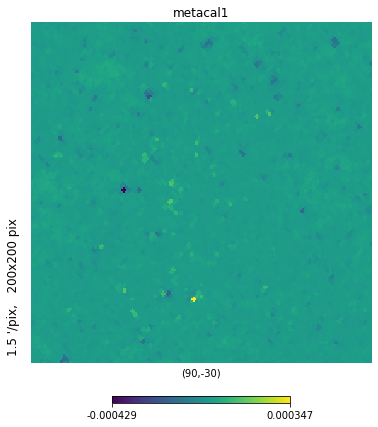

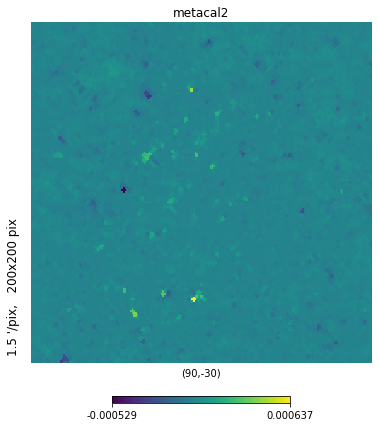

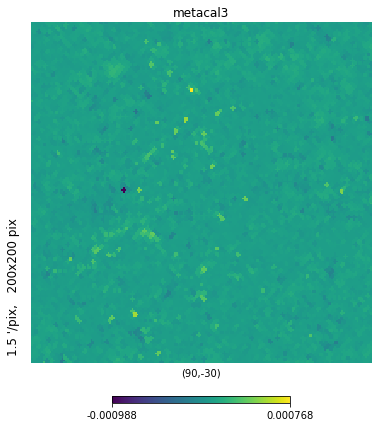

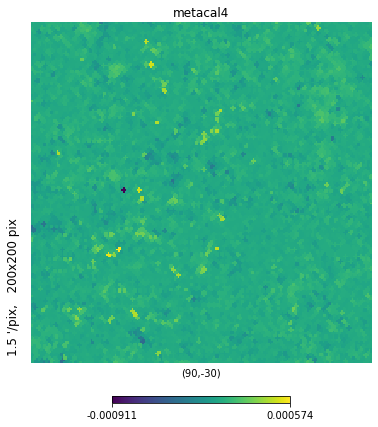

In [53]:
with h5py.File(FILE, "r") as f:
    for wl_bin in wl_bins:
        hp_map = np.zeros(npix)
        hp_map[pix_ind] = f[f"kd/{wl_bin}"][:]
        
        # hp.mollview(hp_map, title=wl_bin)
        hp.gnomview(hp_map, rot=(90, -30, 0), title=wl_bin)

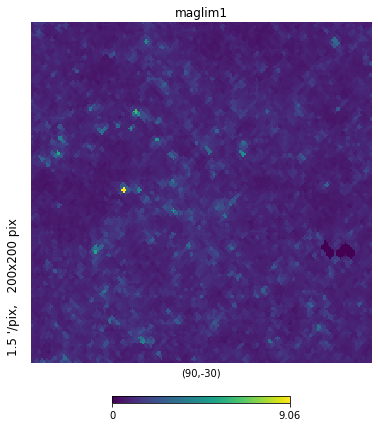

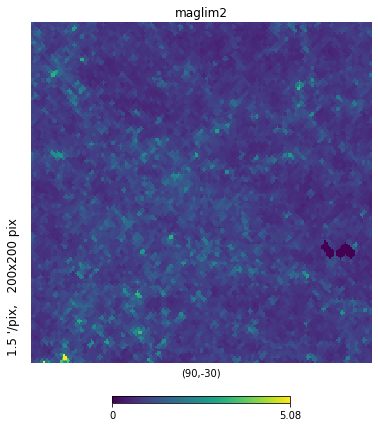

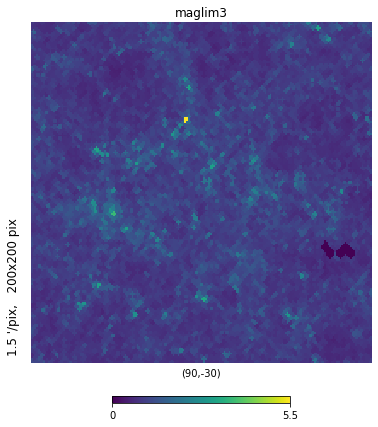

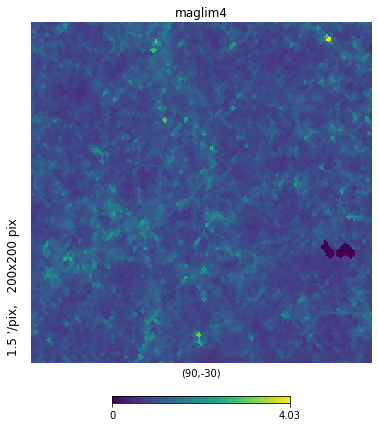

In [73]:
with h5py.File(FILE, "r") as f:
    for wl_bin in gc_bins:
        hp_map = np.zeros(npix)
        hp_map[pix_ind] = f[f"dg/{wl_bin}"][:]
        
        # hp.mollview(hp_map, title=wl_bin)
        hp.gnomview(hp_map, rot=(90, -30, 0), title=wl_bin)